In [2]:
import cv2 
import numpy as np
import matplotlib.pylab as plt
import math 
from function import SelectShapeStd


def showC(img):
    rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,cmap="gray")
    
def show(img):
    plt.imshow(img,cmap="gray")

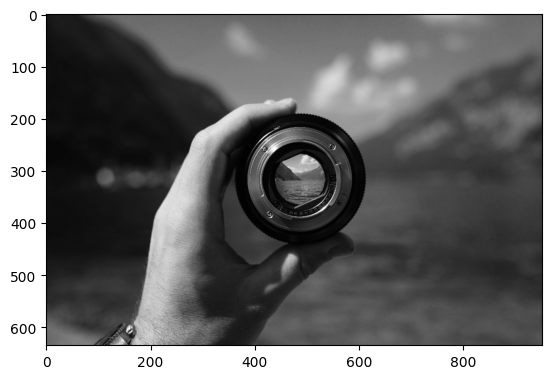

In [54]:
gray = cv2.imread("images/lens.png", 0)
showC(gray)

## **Image Transformation**
1. Bien doi am ban
2. Bien doi logarit co so e
3. Bien doi ham mu
5. Bien doi tuyen tinh tung phan
6. Tuong cuong anh (Image Enhence)

## Bien doi am ban

$$ I'(y,x) = L - 1 - I(y,x)$$

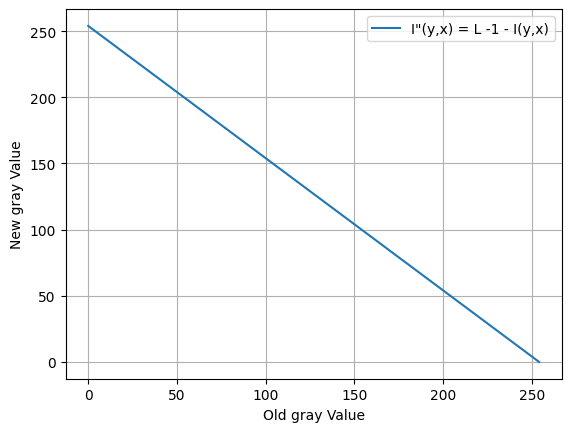

In [7]:
def draw ():
    x = np.arange(0,255,1)
    y = 255 - 1 - x
    
    # Ve
    plt.plot(x,y,label= f'I"(y,x) = L -1 - I(y,x)')
    plt.xlabel("Old gray Value")
    plt.ylabel("New gray Value")
    plt.legend()
    plt.grid(True)
    plt.show()
    
draw()

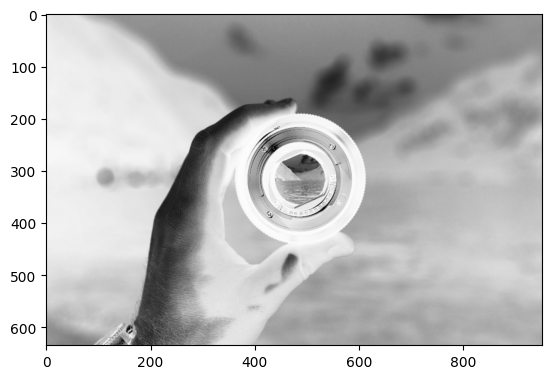

In [55]:
def am_ban(img):
    result = np.max(img) - 1 - img
    
    return result

result = am_ban(gray)
showC(result)

## Bien doi logarit co so e

$$I"(y,x) =  c* log(1+I(y,x))$$

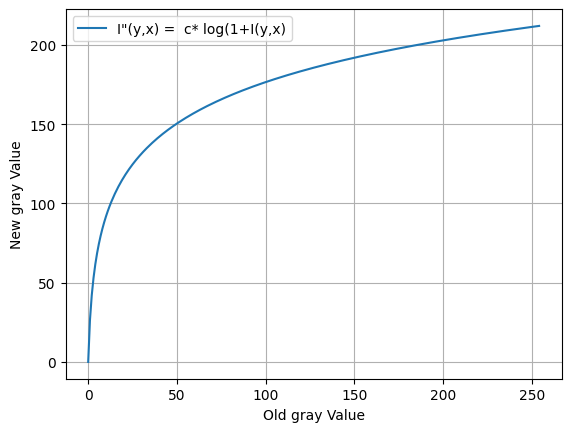

In [61]:
def draw(c = 0.1):
    x = np.arange(0,255,1)
    y = 255* c * np.log(1+x)
    
    # Ve
    plt.plot(x,y,label= f'I"(y,x) =  c* log(1+I(y,x)')
    plt.xlabel("Old gray Value")
    plt.ylabel("New gray Value")
    plt.legend()
    plt.grid(True)
    plt.show()
    
draw(c =0.15)

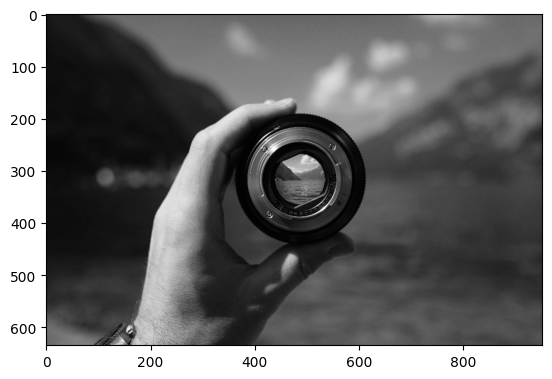

In [56]:
show(gray)

In [37]:
np.log(np.array(100))

4.605170185988092

In [47]:
0.1 * np.log(1+250) * 255

140.8990499478605

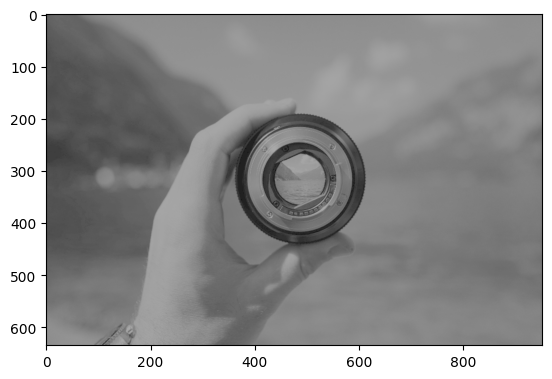

In [62]:
def logarit_transform(img, c = 0.1):
    
    logarit = np.zeros((img.shape[0], img.shape[1]), dtype= np.uint8)
    
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            old_value = img[y,x]
            
            new_value = 255 *  c * math.log(1 + old_value)
           
            logarit[y,x] = int(new_value)
            
    return logarit
            
logarit =  logarit_transform(gray, c = 0.12)

showC(logarit)

## Bien doi ham mu

$$I"(y,x) = c * I(y,x)^{gama}$$

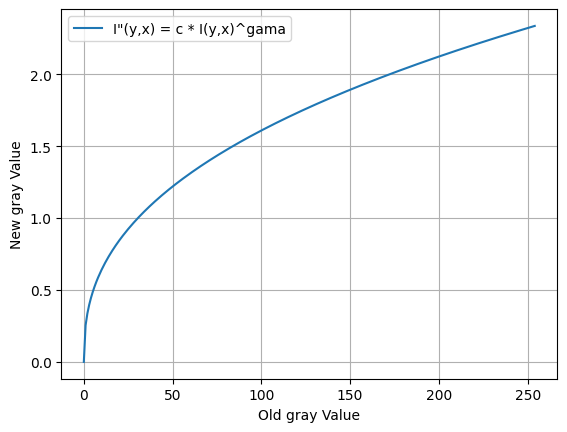

In [121]:
def draw(c = 0.1, gama = 0.1):
    x = np.arange(0,255,1)
    y = 255* c * np.power(x, gama)
    
    # Ve
    plt.plot(x,y,label= f'I"(y,x) = c * I(y,x)^gama')
    plt.xlabel("Old gray Value")
    plt.ylabel("New gray Value")
    plt.legend()
    plt.grid(True)
    plt.show()
    
draw(c = 0.001, gama = 0.4)

In [93]:
math.pow(9,0.5)

3.0

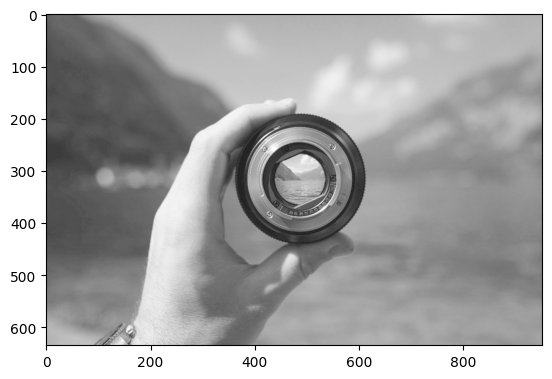

In [110]:
def gama_transformation(img, c =0.1, gama = 0.1):
    
    gama_space = np.zeros((img.shape[0], img.shape[1]), dtype= np.uint8)
    
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            
            old_value = img[y,x]
            new_value = 255 * c * math.pow(old_value , gama)
            gama_space[y,x] = int(new_value)
            
    return gama_space

gama = gama_transformation(gray, c = 0.1, gama =0.4)
show(gama)

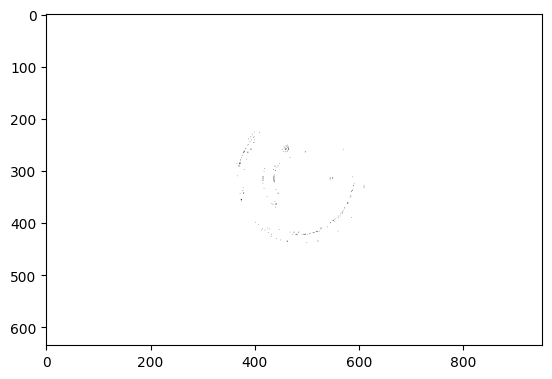

In [130]:
gama_logarit = gama_transformation(logarit, c = 0.001, gama = 0.4)
show(gama_logarit)

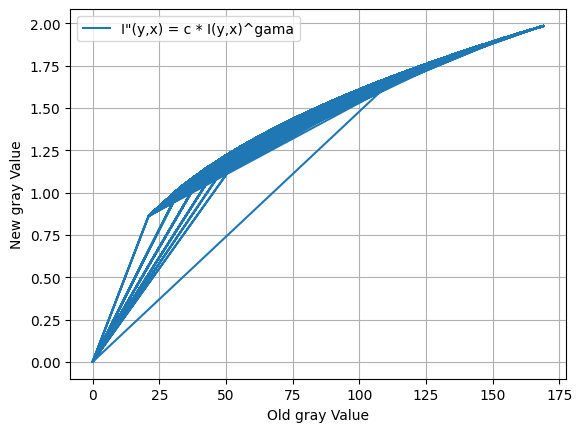

In [129]:
def draw(img, c = 0.1, gama = 0.4):
    x = img.flatten()
    y = 255* c * np.power(x, gama)
    
    # Ve
    plt.plot(x,y,label= f'I"(y,x) = c * I(y,x)^gama')
    plt.xlabel("Old gray Value")
    plt.ylabel("New gray Value")
    plt.legend()
    plt.grid(True)
    plt.show()
    
draw(logarit, c = 0.001, gama = 0.4)

## Bien doi tuyen tinh tung phan

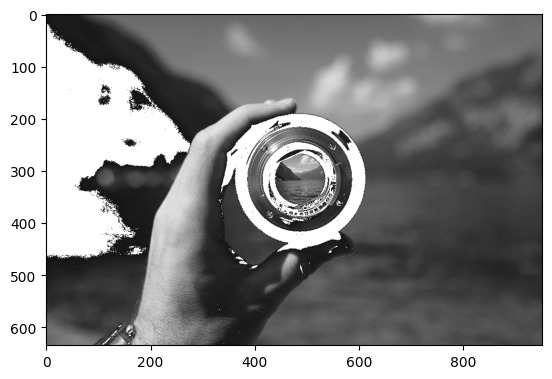

In [135]:
def linear_transformation(img, t1, t2):
    
    linear_space  = np.zeros((img.shape[0], img.shape[1]),dtype = np.uint8)
    
    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            gray_value = img[y,x]
            if  0 <= gray_value <=t1 :
                linear_space[y,x] = gray_value
                
            elif t1 < gray_value <=t2 :
                linear_space[y,x] = 255
        
            elif  t2 < gray_value <=255 :
                linear_space[y,x] = gray_value
                
    return linear_space
            
linear_space =    linear_transformation(gray,0, 20)
show(linear_space)        

In [137]:
type(linear_space)

numpy.ndarray

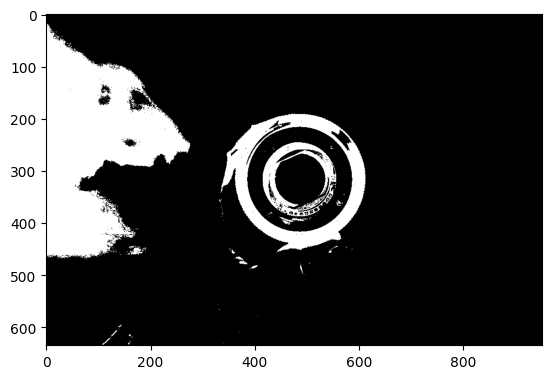

In [139]:
_,threshold = cv2.threshold(linear_space, 254, 255, cv2.THRESH_BINARY)
show(threshold)

## Tang cuong anh (Tang cuong do tuong phan cho anh)

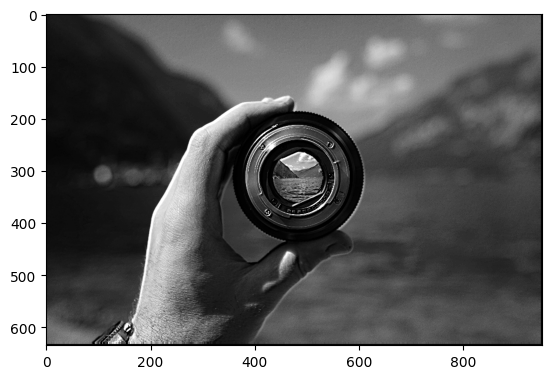

In [148]:
def emphasize(img, kernel_size = (3,3), c = 1.0):
    
    height, width = img.shape[0], img.shape[1]
    
    emphasize_space  = np.zeros((img.shape[0], img.shape[1]),dtype = np.uint8)
    k_height,k_width  = kernel_size
    for y in range(height - k_height ):
        for x in range(width - k_width):
            
            crop  = img[y : y+k_height , x: x+k_width]
            mean_value = np.mean(crop)
            
            for j in range(k_height):
                for i in range(k_width):
                    ori = int(img[y+j ,x+i])
                    
                    new_value = int((ori-mean_value) *  c) + ori

                    if new_value <=0 :
                        new_value = 0
                        
                    elif new_value >=255 :
                        new_value = 255
                        
                    emphasize_space[y : y+j , x: x+i] = new_value

    return emphasize_space.astype(np.uint8)
    
emphasize_space = emphasize(gray,(5,5), 1.2)
show(emphasize_space)

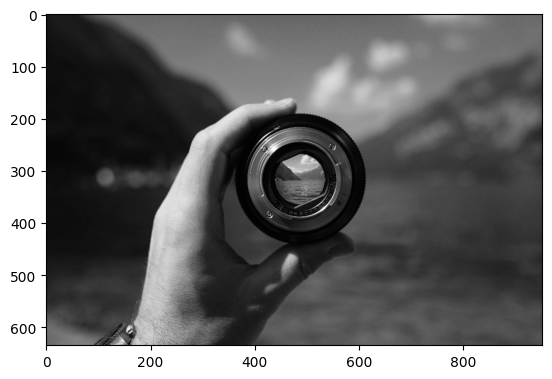

In [149]:
show(gray)

## **Evaluate image quality**

1. Tinh do sang cua anh (Brightness)
2. Do tuong phan cua anh (Contrast)
3. Information (Entropy)
4. Sharpness (Do net cua bien anh)

## Do sang cua anh (Cuong do sang trung binh)

$$M = mean(I(y,x))$$

In [152]:
def calculate_brightness(gray_image):
    brightness = np.mean(gray_image)
    return brightness

In [153]:
brightness_value = calculate_brightness(gray)
print(f"Độ sáng của ảnh là: {brightness_value}")

Độ sáng của ảnh là: 76.53804671474889


## Do tuong phan cua anh (Phuong sai/Do lech chuan cua anh)

$$variance = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

In [154]:
def variance(matrix):
    mean = np.mean(matrix)
    N = matrix.shape[0] * matrix.shape[1]
    variance = (1 / N) * (np.sum((matrix - mean)**2))

    return variance

def std(matrix):

  return math.sqrt(variance(matrix))

In [156]:
variance_x  = variance(gray)
std_value = std(gray)
print(f'Độ tương phản của ảnh là: {std_value}')

Độ tương phản của ảnh là: 50.241332278729764


## Thong Tin cua anh


$$Entropy = - \Sigma_{i=0}^{255} rel[i]*log_{2}(rel[i]) $$

In [158]:
def calc_entropy(gray):
    
  min_gray, max_gray , _, _ = cv2.minMaxLoc(gray, mask  = None)

  hist = cv2.calcHist([gray],[0], None, [256], [min_gray, max_gray])

  entropy = 0.0

  hist = (hist / np.sum(hist))
  for i in range(256):
    num_pixel = hist[i][0]
    if num_pixel ==0:
        log = 0

    else:
        log = math.log(num_pixel, math.e)

    entropy += - num_pixel*log

  return entropy

In [159]:
entropy = calc_entropy(gray)
print(f'Lượng thông tin của ảnh là" {entropy}')

Lượng thông tin của ảnh là" 5.161758596911802


## Do net cua anh (Do net cua bien anh)
$$G = \frac{1}{M*N}*\Sigma_{i=0} * \Sigma_{j=0} \sqrt{(G_X(i,j))^2 + (G_Y(i,j))^2} $$

Trong đó: 
$$G_X(i,j) = I(i+1,j) - I(i,j)$$
$$G_Y(i,j) = I(i,j+1) - I(i,j)$$

In [166]:
def cal_sharpness(matrix):
    # Scale 1.0
    matrix  = matrix / 255.0
    size = matrix.shape[0]* matrix.shape[1]
    G_X = np.zeros((matrix.shape[0], matrix.shape[1]),dtype = np.float16)
    G_Y = np.zeros((matrix.shape[0], matrix.shape[1]),dtype = np.float16)

    height = matrix.shape[0]
    width = matrix.shape[1]

    for y in range(height-1):
        for x in range(width-1):

            G_X[y,x] = matrix[y,x+1] -  matrix[y,x]
            G_Y[y,x] = matrix[y+1,x] -  matrix[y,x]

    G = np.sum(G_X**2 + G_Y**2)

    return np.sqrt(G)  , G_X, G_Y

In [170]:
sharpness,G_X, G_Y = cal_sharpness(gray)
new_sharp ,_,_ = cal_sharpness(emphasize_space)
print(f'Độ nét của ảnh là: {sharpness}')
print(f'Độ nét của ảnh sau khi emphasize là: {new_sharp}')

Độ nét của ảnh là: 33.9375
Độ nét của ảnh sau khi emphasize là: 61.875
